In [1]:
print('hoge')

hoge


In [6]:
a = 13 

In [7]:
a

13

In [8]:
b = a * 2

In [9]:
b

26

In [18]:
import numpy as np
import pystan
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline
from scipy import stats

In [5]:
def display_dist(dists, xlim=None):
    x = np.linspace(0, 1, 501)
    for i, dist in enumerate(dists):
        y = dist.pdf(x)
        plt.plot(x, y, label=f'{i+1}')
        plt.fill_between(x, 0, y, alpha=.2)
    if xlim is not None:
        plt.xlim(xlim)
    plt.legend()

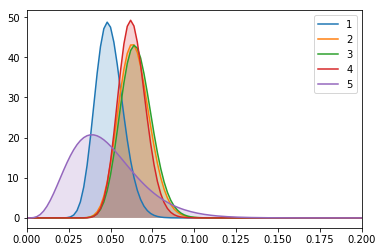

In [56]:
before_a, before_b = 5, 100
prior_a = stats.beta(before_a+29, before_b+583-29)
prior_b = stats.beta(before_a+40, before_b+595-40)
prior_c = stats.beta(before_a+41, before_b+597-41)
prior_d = stats.beta(before_a+51, before_b+784-51)
prior = stats.beta(before_a, before_b)
display_dist([prior_a, prior_b, prior_c, prior_d, prior], xlim=(0, 0.2))

In [57]:
n_sample = 30000
samples_a = prior_a.rvs(n_sample)
samples_d = prior_d.rvs(n_sample)

In [58]:
print(f"Probability that b is higher than a:  {(samples_a < samples_d).mean():.2%}")

Probability that b is higher than a:  87.51%


In [24]:
model = """
data { 
  int<lower=0> N; // 学習データの数
  real X[N]; // 単回帰モデルの入力x
  real Y[N]; // 単回帰モデルの出力y
}
parameters { // parameterセクション
  real alpha; // 単回帰モデルの切片
  real beta; // 単回帰モデルのxの係数
  real<lower=0> sigma; // 単回帰モデルからの誤差の標準偏差
}
model { // モデルを宣言するmodelセクション
  for (n in 1:N)  {
    Y[n]  ~  normal(alpha + beta * X[n], sigma); // 線形単回帰モデル
  }
}"""

stan_data = {'N': 20, 'X':X, 'Y': Y}
fit = pystan.stan(model_code=model, data=stan_data, iter=3000, chains=3, thin=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7967297ab452fd92f2ab176883f8de2f NOW.
/Users/yutaro_ikeda/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


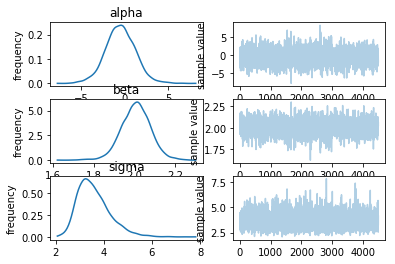

In [31]:
d = fit.plot()